In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import math
import random

dataDir = 'c:/Users/llave/Documents/CMS/data/'

In [2]:
coords = np.load(dataDir+"coords.npz")
identified_coords = coords["identified_coords"]
all_coords = coords["all_coords"]

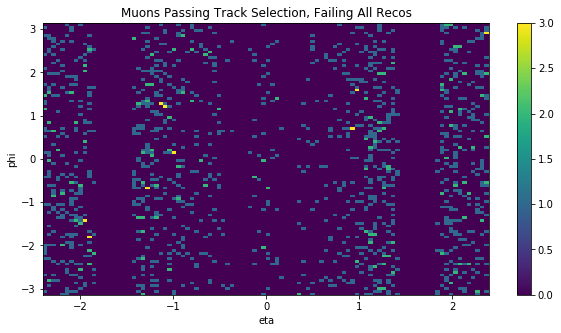

In [20]:
total_etas = all_coords[:,0]
total_phis = all_coords[:,1]
plt.figure(figsize=(10,5))
plt.title("Muons Passing Track Selection, Failing All Recos")
plt.xlabel("eta")
plt.ylabel("phi")
hist, xbins, ybins, im = plt.hist2d(total_etas, total_phis, range=[[-2.4,2.4],[-math.pi,math.pi]],bins=100)
plt.colorbar()

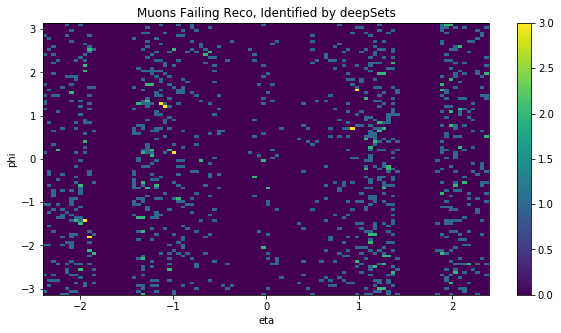

In [21]:
identified_etas = identified_coords[:,0]
identified_phis = identified_coords[:,1]
plt.figure(figsize=(10,5))
plt.title("Muons Failing Reco, Identified by deepSets")
plt.xlabel("eta")
plt.ylabel("phi")
hist2, xbins2, ybins2, im = plt.hist2d(identified_etas, identified_phis, range=[[-2.4,2.4],[-math.pi,math.pi]], bins=100)
plt.colorbar()

1083.0 1316.0


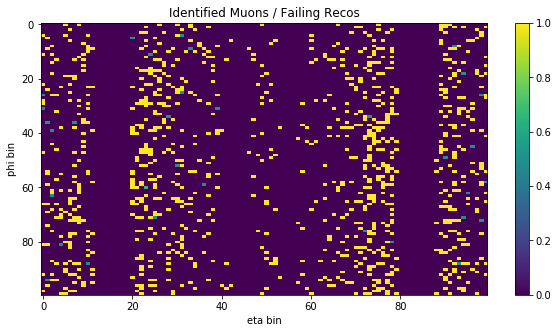

In [23]:
ratio_hist = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        if(hist2[i,j] > (hist[i,j])): print(i,j)
        if(not(hist[i,j] == 0)): ratio_hist[i,j] = 1.0*hist2[i,j]/(hist[i,j])
        else: ratio_hist[i,j] = 0
plt.figure(figsize=(10,5))
plt.title("Identified Muons / Failing Recos")
plt.xlabel("eta bin")
plt.ylabel("phi bin")
plt.imshow(np.rot90(ratio_hist), aspect='auto')
plt.colorbar()
print(np.sum(hist2),np.sum(hist))

In [3]:
resultsDir = "c:/Users/llave/Documents/CMS/plots/failSelection_p0/"
indices = np.load(resultsDir+"outputFiles/falseEventsB.npy",allow_pickle=True)
indices = np.reshape(indices,(int(indices.shape[0]/4),4))
print(indices.shape)
false_indices = np.array([x for x in indices if x[3]>0.5])
true_indices = np.array([x for x in indices if x[3]<0.5])
print(true_indices.shape, false_indices.shape)

(312575, 4)
(304748, 4) (7827, 4)


7827.0


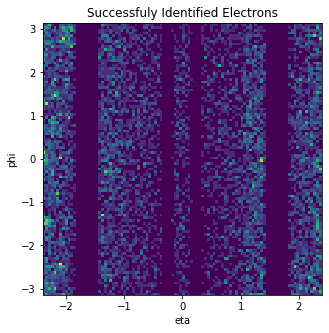

In [27]:
plt.figure(figsize=(5,5))
plt.title("Successfuly Identified Electrons")
plt.xlabel("eta")
plt.ylabel("phi")
hist3,_,_,_ = plt.hist2d(etas,phis,bins=100)
print(np.sum(hist3))

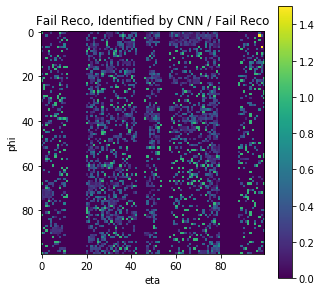

In [22]:
ratio_hist_2 = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        if(not(hist2[i,j] == 0)): ratio_hist_2[i,j] = 1.0*hist3[i,j]/hist2[i,j]
        else: ratio_hist_2[i,j] = 0
plt.figure(figsize=(5,5))
plt.title("Fail Reco, Identified by CNN / Fail Reco")
plt.xlabel("eta")
plt.ylabel("phi")
plt.imshow(np.rot90(ratio_hist_2))
plt.colorbar()

In [10]:
nPassTauReco = len([x for x in tauRecos if math.fabs(x)<0.15])
nPassMuonReco = len([x for x in muonRecos if math.fabs(x)<0.15])
print(nPassTauReco,nPassTauReco*1.0/len(false_indices))
print(nPassMuonReco,nPassMuonReco*1.0/len(false_indices))

663 9.895522388059701
202 3.014925373134328


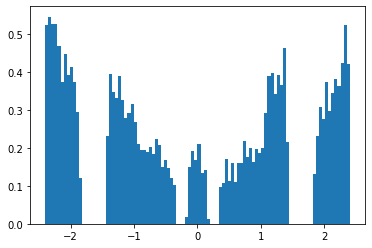

In [23]:
counts, bins, patches = plt.hist(np.array(etas),density=True,bins=100)
np.savez_compressed("a",counts= counts, bins=bins )

(array([105.,  71.,  74.,  76.,  81.,  66.,  84.,  85.,  83.,  85.,  89.,
         87.,  68.,  70.,  72.,  71.,  54.,  64.,  69.,  77.,  74.,  83.,
         70.,  81.,  75.,  69.,  75.,  81.,  79.,  80.,  66.,  75.,  62.,
         71.,  70.,  76.,  65.,  77.,  76.,  63.,  80.,  69.,  72.,  90.,
         78.,  96.,  93.,  75.,  91., 107.,  95.,  68.,  72.,  66.,  76.,
         84.,  88.,  64.,  83.,  98.,  68.,  87.,  83.,  97.,  88.,  84.,
         81.,  81.,  73.,  69.,  75.,  86.,  76.,  84.,  91.,  81.,  80.,
         61.,  78.,  96.,  82.,  76.,  74.,  69.,  66.,  73.,  69.,  82.,
         81.,  69.,  70.,  80.,  78.,  95.,  90.,  93.,  65.,  87.,  89.,
         76.]),
 array([-3.14132047e+00, -3.07850252e+00, -3.01568457e+00, -2.95286661e+00,
        -2.89004866e+00, -2.82723071e+00, -2.76441276e+00, -2.70159481e+00,
        -2.63877686e+00, -2.57595891e+00, -2.51314096e+00, -2.45032301e+00,
        -2.38750506e+00, -2.32468711e+00, -2.26186915e+00, -2.19905120e+00,
        -2.136

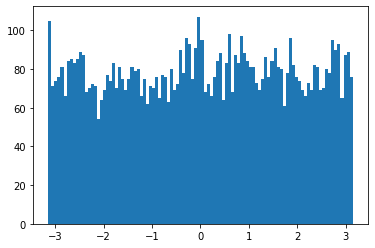

In [29]:
plt.hist(phis,bins=100)